In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

%matplotlib inline

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Null hypothesis: the number of hurricanes in 2015 is expected basing on known trend.
The selected significance level α is: 0.0013.


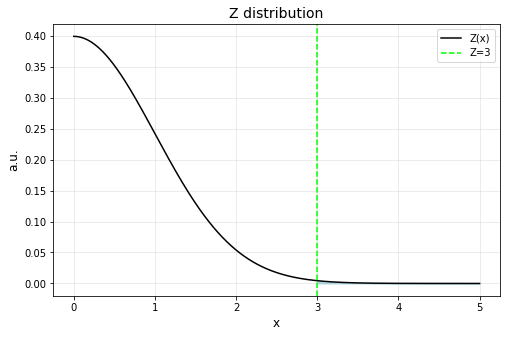

In [41]:
#Exercise n.1

#Defining the significance level α by assuming as statistically significant a probability that has a Z score of 3 
#or larger with respect a normal distribution
Z=3

#Z distribution plotting 
xz=np.linspace(0, 5, 1000)#evaluating only the right tail for the plot
yz=stats.norm.pdf(xz)

fig, ax1=plt.subplots(figsize=(8, 5))
ax1.plot(xz, yz, label='Z(x)', color='black')
ax1.fill_between(xz, yz, where=xz>Z, color='lightblue')
ax1.axvline(Z, linestyle='--', color='lime', label='Z=3')
ax1.set_title('Z distribution',  fontsize=14)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('a.u.', fontsize=12)
ax1.grid(alpha=0.3)
ax1.legend(loc='best')

#Obtaining the reference significance level α (one side test)
alpha=(1-stats.norm.cdf(Z))
print('Null hypothesis: the number of hurricanes in 2015 is expected basing on known trend.')
print('The selected significance level α is: %.4f.' %(alpha))

Z=3.4662

The probability of observing 15 or more hurricanes in one year is: 0.0022.
Therefore the p-value is: 0.0022.

Since p-value=0.0022 > α=0.0013 the null hypotesis is accepted: the number of hurricanes in 2005
is predictable basing on the historic trend.


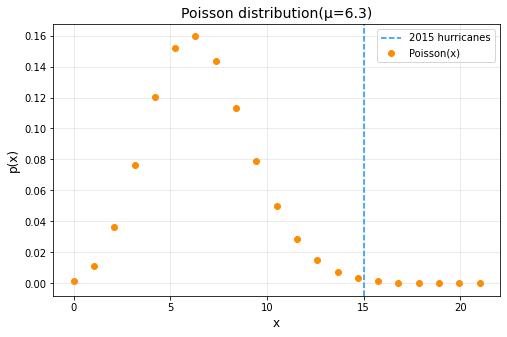

In [44]:
def poisson(mu, n):
    return np.exp(-mu)*pow(mu, n)/np.math.factorial(n)

#Possion distribution: std-dev=sqrt(mean)
mu=6.3
sigma=np.sqrt(6.3)
x0=15
Z=abs(x0-mu)/sigma
print('Z=%.4f\n' %Z)
    
# plotting the measurement and its assumed pdf
x=np.linspace(0, 21, 21)
y=[poisson(mu, n) for n in range(0,21)]
fig, ax2=plt.subplots(figsize=(8, 5))
ax2.scatter(x, y, label='Poisson(x)', color='darkorange')
ax2.axvline(x0, linestyle='--', color='dodgerblue', label='2015 hurricanes')
ax2.set_title('Poisson distribution(μ=6.3)',  fontsize=14)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('p(x)', fontsize=12)
ax2.grid(alpha=0.3)
ax2.legend(loc='best')

#p-value calculation
prob=0 #probability of less than 15 hurricanes in one year
for n in range(0, x0):
    prob+=poisson(mu, n)
pvalue=1-prob #probability of 15 or more hurricanes in one year->corresponds to the p-value itself for a discrete 
#distribution

 
print('The probability of observing 15 or more hurricanes in one year is: %.4f.' %pvalue)
print('Therefore the p-value is: %.4f.\n' %pvalue)
print('Since p-value=%.4f > α=%.4f the null hypotesis is accepted: the number of hurricanes in 2005' %(pvalue,alpha))
print('is predictable basing on the historic trend.')

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

Null hypothesis: halogen lighting exposure does not affect blood pressure.
The selected significance level is α=0.05.

T=-3.7870

The p-value corresponding to the null hypotesis is: 0.004
Since p-value<α the null hypotesis is rejected: halogen lighting exposure might affect blood pressure.


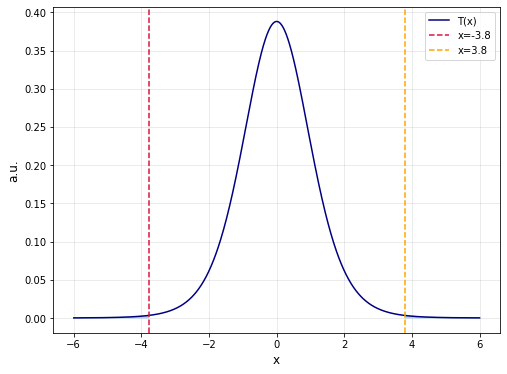

In [49]:
#Exercise n.2

print('Null hypothesis: halogen lighting exposure does not affect blood pressure.')
print('The selected significance level is α=0.05.')

pre=np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post=np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n=10
mean_pre, mean_post=np.mean(pre), np.mean(post)
sigma_pre, sigma_post=np.sqrt(np.var(pre, ddof=1)), np.sqrt(np.var(post, ddof=1))
                                                            
sigma=np.sqrt((sigma_pre**2+sigma_post**2)/2)
T=(mean_pre-mean_post)/(sigma*np.sqrt(2/n))
print('\nT=%1.4f' %T)        


# plot the test statistics and its pdf
xs=np.linspace(-6, +6, 1000)
ts=stats.t.pdf(xs, n-1)

fig, ax=plt.subplots(figsize=(8, 6))
ax.plot(xs, ts, color='navy', label='T(x)')
ax.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
ax.axvline(T, linestyle='--', color='crimson', label='x=-3.8')
ax.axvline(-T, linestyle='--', color='orange', label='x=3.8')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('a.u.', fontsize=12)
ax.grid(alpha=0.3)
ax.legend(loc='best')

pvalue=stats.t.cdf(T, n-1) + (1.-stats.t.cdf(-T, n-1))
print('\nThe p-value corresponding to the null hypotesis is: %1.3f' % pvalue)
print('Since p-value<α the null hypotesis is rejected: halogen lighting exposure might affect blood pressure.')

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

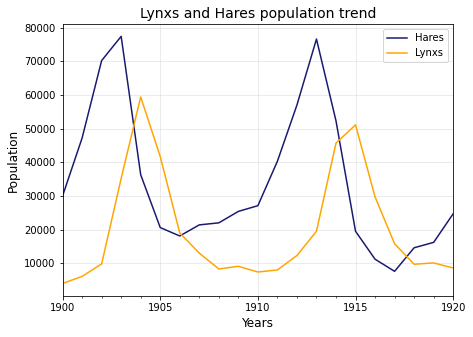

In [56]:
#Exercise n.3

from scipy import fftpack

data = np.loadtxt('data/populations.txt')
year, hare, lynx, carrots=data.T #creating an array with the data

#Plotting lynxs-hares populations
fig, ax1 = plt.subplots(figsize=(7, 5))
ax1.plot(year, hare, color='midnightblue', label='Hares')
ax1.plot(year, lynx, color='orange', label='Lynxs')
ax1.set_title('Lynxs and Hares population trend', fontsize=14)
ax1.set_xlabel('Years', fontsize=12)
ax1.set_ylabel('Population', fontsize=12)
ax1.set_xlim(1900,1920)
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.legend(loc='best')
ax1.grid(alpha=0.3)

The period of the hares population is: 10.50 years.
The period of the lynxs population is: 10.50 years.


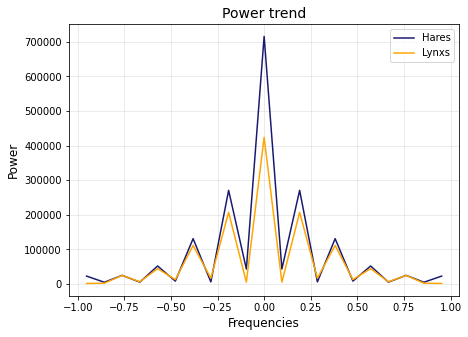

In [57]:
time_step=0.5 #half an year
hare_fft=fftpack.fft(hare)
lynx_fft=fftpack.fft(lynx)
hare_freq=fftpack.fftfreq(hare.size, d=1) 
lynx_freq=fftpack.fftfreq(lynx.size, d=1)

fig, ax2 = plt.subplots(figsize=(7, 5))
ax2.plot(fftpack.fftshift(freq), fftpack.fftshift(np.abs(hare_fft)), color='midnightblue', label='Hares')
ax2.plot(fftpack.fftshift(freq), fftpack.fftshift(np.abs(lynx_fft)), color='orange', label='Lynxs')
ax2.set_title('Power trend', fontsize=14)
ax2.set_xlabel('Frequencies', fontsize=12)
ax2.set_ylabel('Power', fontsize=12)
ax2.legend(loc='best')
ax2.grid(alpha=0.3)

#Determining the period of the two populations 
mask=np.where(freq>0) #positive frequencies
period_hare=1/hare_freq[mask][np.abs(hare_fft)[mask].argmax()] 
period_lynx=1/lynx_freq[mask][np.abs(lynx_fft)[mask].argmax()]
print('The period of the hares population is: %.2f years.' % period_hare)
print('The period of the lynxs population is: %.2f years.' % period_lynx)
#The two populations present the same period. 

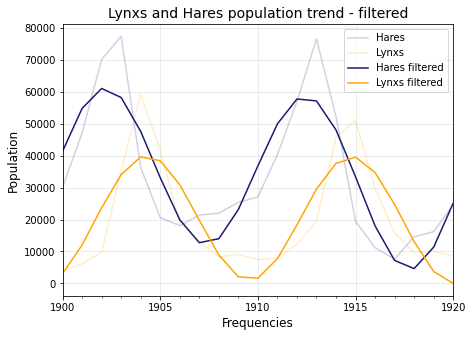

In [61]:
#Filtering the noise on the initial datasets
hare_fft1=hare_fft.copy()
lynx_fft1=lynx_fft.copy()
hare_fft1[np.abs(hare_freq)>(1/period_hare)] = 0
lynx_fft1[np.abs(lynx_freq)>(1/period_lynx)] = 0

#Final filtered trends (inverse fft)
hare_final=np.real(fftpack.ifft(hare_fft1))
lynx_final=np.real(fftpack.ifft(lynx_fft1))

fig, ax3 = plt.subplots(figsize=(7, 5))
ax3.plot(year, hare, color='midnightblue', label='Hares', alpha=0.2)
ax3.plot(year, lynx, color='orange', label='Lynxs', alpha=0.2)
ax3.plot(year, hare_final, color='midnightblue', label='Hares filtered')
ax3.plot(year, lynx_final, color='orange', label='Lynxs filtered')
ax3.set_title('Lynxs and Hares population trend - filtered', fontsize=14)
ax3.set_xlabel('Frequencies', fontsize=12)
ax3.set_ylabel('Population', fontsize=12)
ax3.set_xlim(1900,1920)
ax3.xaxis.set_major_locator(MultipleLocator(5))
ax3.xaxis.set_minor_locator(AutoMinorLocator(5))
ax3.legend(loc='best')
ax3.grid(alpha=0.3)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

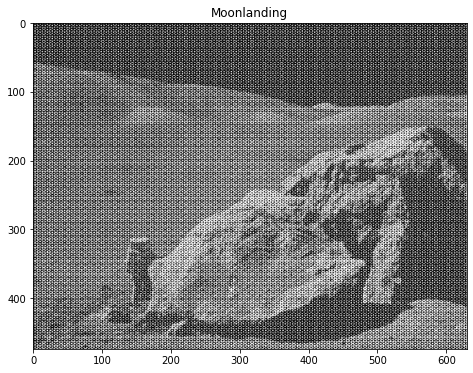

In [4]:
#Exercise n.4

image=plt.imread('data/moonlanding.png')
plt.figure(figsize=(10,6))
plt.imshow(image, plt.cm.gray)
plt.title("Moonlanding");

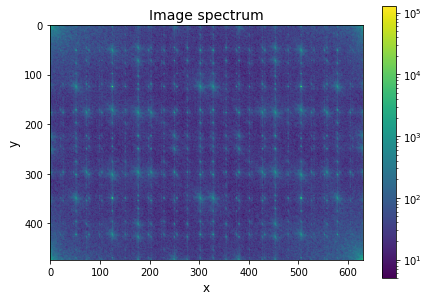

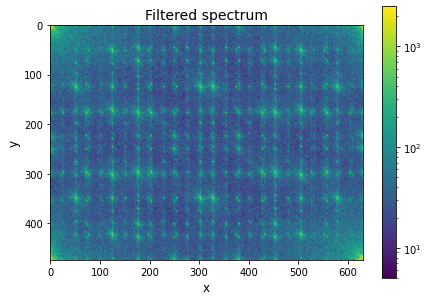

In [10]:
from scipy import fftpack
from matplotlib.colors import LogNorm

#Obtaining the power spectrum and plotting it 
fft2d_image=fftpack.fft2(image)
power_spectrum=np.abs(fft2d_image) #transforming the complex object

fig, ax=plt.subplots(figsize=(7, 5))
ps=ax.imshow(power_spectrum, norm=LogNorm(vmin=5))
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Image spectrum', fontsize=14)
plt.colorbar(ps)



#The goal is to remove the high (noisy) frequencies from the spectrum by setting those components to zero. 
filtered_fft2d_image=fft2d_image.copy()
filtered_fft2d_image[power_spectrum>2500]=0 #High frequencies are set to zero.

#Plotting the power spectrum after removing the noise
fig, ax1=plt.subplots(figsize=(7, 5))
fs=ax1.imshow(np.abs(filtered_fft2d_image), norm=LogNorm(vmin=5))
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Filtered spectrum', fontsize=14)
plt.colorbar(fs)

Text(0.5, 1.0, 'Reconstructed Image')

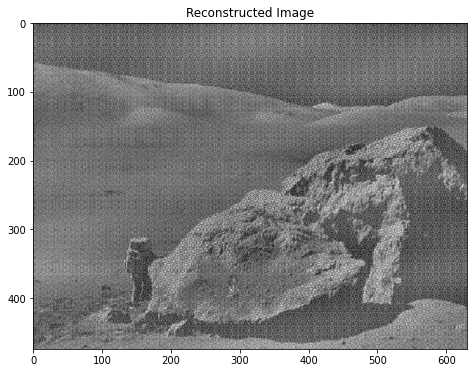

In [9]:
#Finally reconstructing the image through the inverse of the Fourier transformation
filtered_image=np.real(fftpack.ifft2(filtered_fft2d_image))

plt.figure(figsize=(10,6))
plt.imshow(filtered_image, plt.cm.gray)
plt.title('Reconstructed Image')